# TASK 4: SALES PREDICTION USING PYTHON

### Author: Lithikha B 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
df = pd.read_csv(r"C:\Users\lithi\Desktop\2nd sem\DATA SCIENCE\CodSoft\Dataset\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [29]:
df.shape

(200, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualisation

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


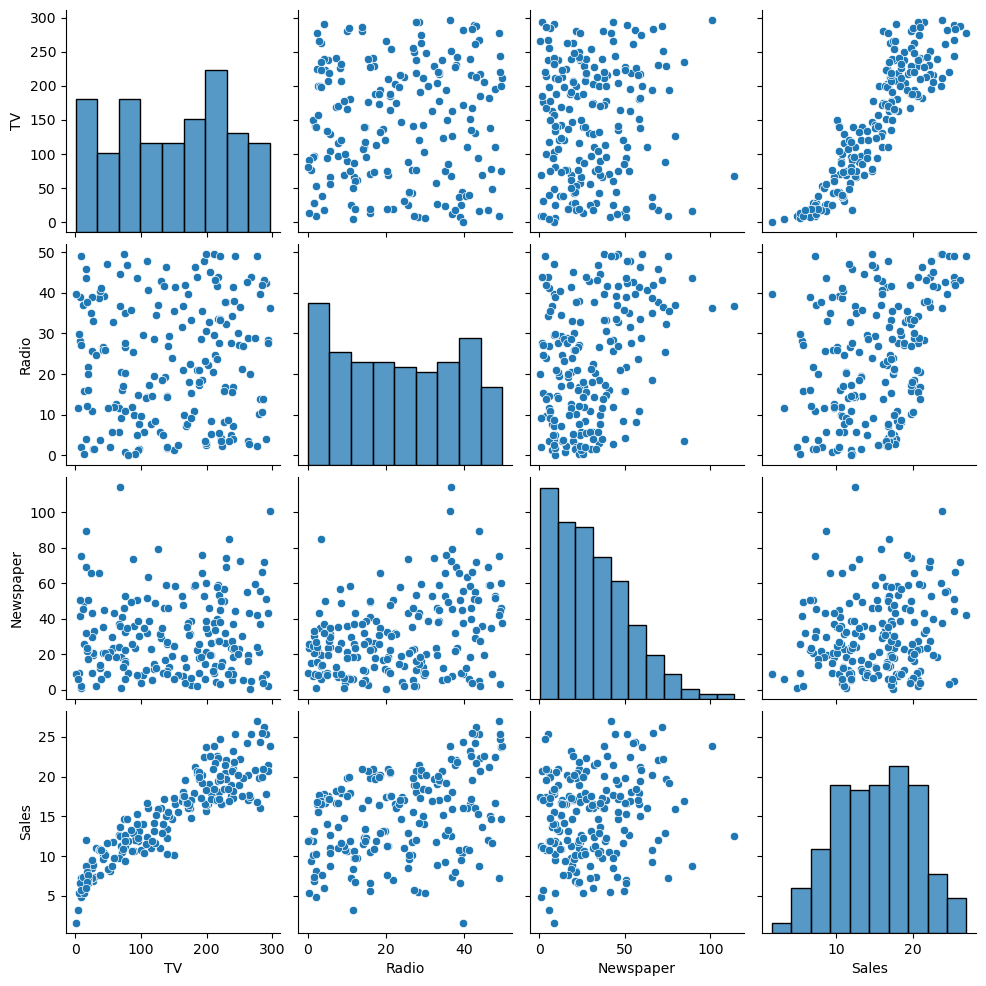

In [32]:
sns.pairplot(df)

### When the advertising cost increases in TV Ads, the sales increases as well.

Text(0, 0.5, 'Frequency')

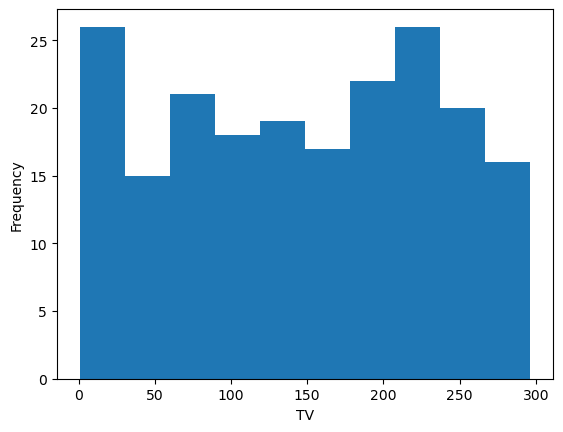

In [33]:
plt.hist(df['TV'])
plt.xlabel('TV')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

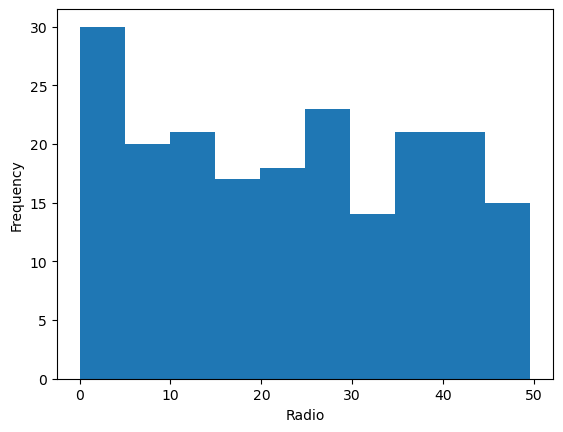

In [34]:
plt.hist(df['Radio'])
plt.xlabel('Radio')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

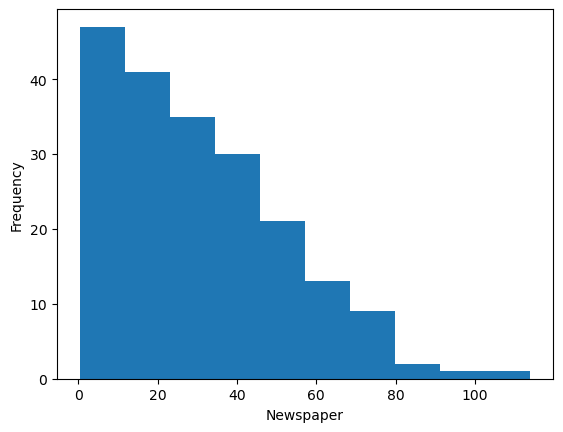

In [35]:
plt.hist(df['Newspaper'])
plt.xlabel('Newspaper')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

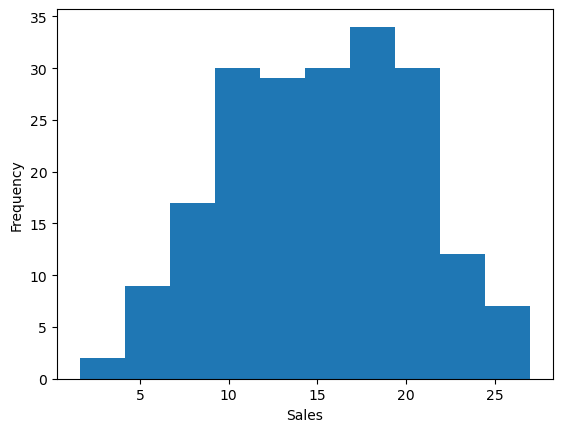

In [36]:
plt.hist(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')

In [37]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Axes: >

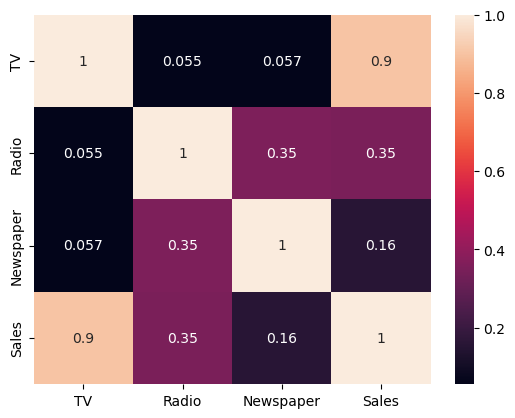

In [38]:
sns.heatmap(df.corr(), annot = True)

#### Sales is highly correlated with TV

## Training and testing the model

In [57]:
df['TV*Radio'] = df['TV'] * df['Radio']
df['TV*Newspaper'] = df['TV'] * df['Newspaper']
df['Radio*Newspaper'] = df['Radio'] * df['Newspaper']


x = df[['TV', 'Radio', 'Newspaper', 'TV*Radio', 'TV*Newspaper', 'Radio*Newspaper']]
y = df[['Sales']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### Scaling

In [58]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Linear Regression

In [65]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [60]:
predict = model.predict(x_test_scaled)
print('Mean_squared_error: ', mean_squared_error(y_test, predict))
print('Mean_absolute_error: ', mean_absolute_error(y_test, predict))
print('r2_score: ', r2_score(y_test, predict))

Mean_squared_error:  2.2356007302648693
Mean_absolute_error:  1.1479402019652043
r2_score:  0.9135062543413273


In [61]:
df['TV*Radio'] = df['TV'] * df['Radio']
df['TV*Newspaper'] = df['TV'] * df['Newspaper']
df['Radio*Newspaper'] = df['Radio'] * df['Newspaper']

## Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)
model.fit(x_train_scaled, y_train)

D:\Anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=15, n_estimators=500, random_state=42)

In [63]:
predict = model.predict(x_test_scaled)
print('Mean_squared_error: ', mean_squared_error(y_test, predict))
print('Mean_absolute_error: ', mean_absolute_error(y_test, predict))
print('r2_score: ', r2_score(y_test, predict))

Mean_squared_error:  1.3318368887999912
Mean_absolute_error:  0.7376839999999989
r2_score:  0.9484722117150783
